In [ ]:
import requests as rq

rq.get("https://data912.com/historical/bonds/AL30").json()

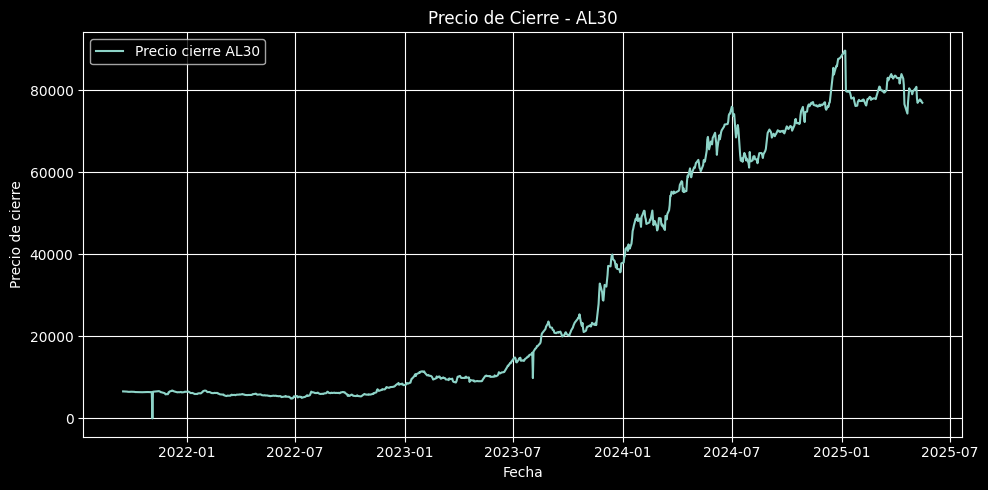

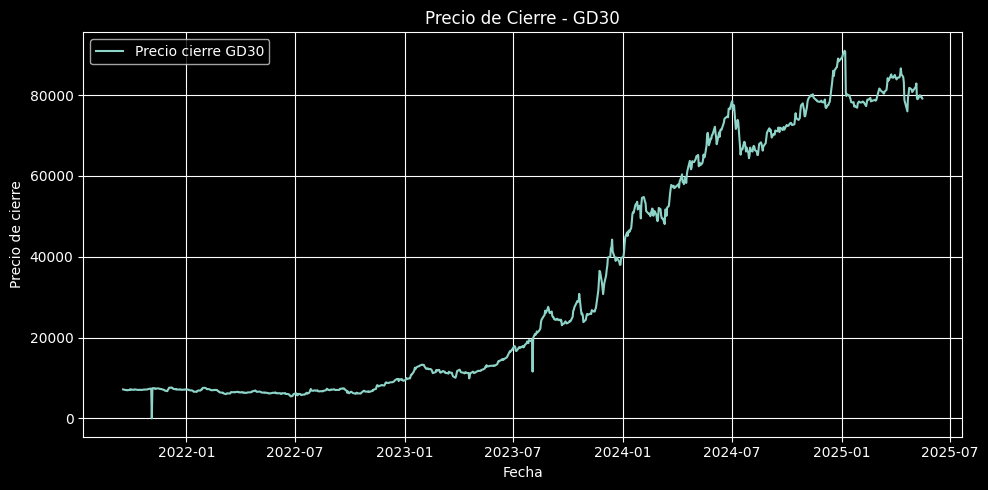

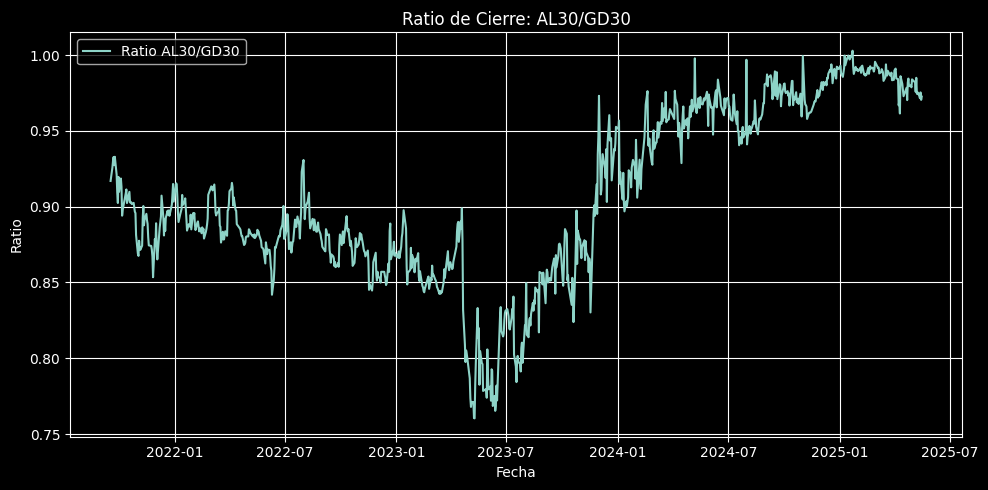

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

def fetch_bond_data(ticker):
    url = f'https://data912.com/historical/bonds/{ticker}'
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    return df

def plot_bond_price(df, ticker):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['c'], label=f'Precio cierre {ticker}')
    plt.title(f'Precio de Cierre - {ticker}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de cierre')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_bond_ratio(df1, df2, ticker1, ticker2):
    ratio = df1['c'] / df2['c']
    common_dates = df1.index.intersection(df2.index)
    ratio = ratio.loc[common_dates]

    plt.figure(figsize=(10, 5))
    plt.plot(ratio.index, ratio, label=f'Ratio {ticker1}/{ticker2}')
    plt.title(f'Ratio de Cierre: {ticker1}/{ticker2}')
    plt.xlabel('Fecha')
    plt.ylabel('Ratio')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
if __name__ == '__main__':
    ticker1 = 'AL30'
    ticker2 = 'GD30'

    df1 = fetch_bond_data(ticker1)
    df2 = fetch_bond_data(ticker2)

    plot_bond_price(df1, ticker1)
    plot_bond_price(df2, ticker2)
    plot_bond_ratio(df1, df2, ticker1, ticker2)
